
### Import Libraries



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


### Load CIFAR Dataset

In [ ]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data() # omport the CIFAR10 dataset


print('x train--> ',X_train.shape) # shape of the training data


print('x test--> ',X_test.shape) # shape of the testing data


170498071/170498071 [==============================] - 14s 0us/step
x train-->  (50000, 32, 32, 3)
x test-->  (10000, 32, 32, 3)


# Reshape and data Handling

In [ ]:
y_train=y_train.reshape(-1,) # Reshape the y_train array to a 1D array
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
y_classes=['airplane','automobile','birds','cat','deer','dog','frog','horse','ship','truck'] #create an array of classes. Will be helpful in the predictions.
len(y_classes)


10

In [ ]:
def showImage(x,y,index):   #Function for image display
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(y_classes[int(y[index])])


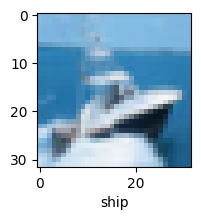

In [ ]:
showImage(X_train,y_train,8)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
#Scaling the data between 1 and 0
X_train=X_train/255
X_test=X_test/255

X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

# CNN Model

In [ ]:
num_of_classes = 10 #  number of classes


model = keras.Sequential() # Create a sequential model

# Convolutional layer with 32 filters, kernel size (3,3), and ReLU activation function
# Input shape is (32,32,3) for CIFAR-10 images
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))


# Max pooling layer with pool size (2,2)
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# Flatten layer to transition from convolutional layers to dense layers
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))

# Dropout layer to reduce overfitting
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

# Output layer with num_of_classes units and softmax activation function for multiclass classification
model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
optimizer=keras.optimizers.Adam(learning_rate=0.001)  #  Adam optimizer with a learning rate of 0.001


 # Compile the model with the specified optimizer, loss function, and metrics
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['acc'])


# Training

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20)  #train the model using 20 epochs

Epoch 1/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8818 - acc: 0.6991 - val_loss: 0.9183 - val_acc: 0.6880
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8632 - acc: 0.7083 - val_loss: 0.8791 - val_acc: 0.7024
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8393 - acc: 0.7164 - val_loss: 0.8859 - val_acc: 0.7001
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8246 - acc: 0.7194 - val_loss: 0.9059 - val_acc: 0.7065
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7985 - acc: 0.7294 - val_loss: 0.8981 - val_acc: 0.7036
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7822 - acc: 0.7332 - val_loss: 0.8957 - val_acc: 0.7058
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7675 - acc: 0.7407 - val_loss: 0.8757 - val_acc: 0.7098
Epoch 8/20
1563/1563 [==============================] - 11s 7m

# Testing

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test) #check the accuracy
print('Test Accuracy =', accuracy*100)

313/313 [==============================] - 1s 3ms/step - loss: 0.9577 - acc: 0.7054
Test Accuracy = 70.53999900817871


# Prediction

In [ ]:
y_pred=model.predict(X_test) #make a prediction

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred[3]

array([7.7723563e-01, 1.7289755e-09, 2.1052833e-06, 1.4318893e-10,
       2.0475238e-08, 4.4742716e-14, 3.8080563e-11, 8.8967902e-15,
       2.2276224e-01, 6.5354229e-09], dtype=float32)

In [ ]:
pred_label = [np.argmax(arr) for arr in y_pred] #loop through all the test cases

In [ ]:
print(pred_label)

[3, 8, 8, 0, 4, 6, 9, 2, 3, 1, 4, 9, 4, 7, 9, 8, 5, 2, 8, 6, 7, 0, 4, 9, 4, 4, 4, 0, 9, 6, 6, 2, 4, 3, 9, 3, 4, 9, 9, 5, 4, 6, 5, 6, 0, 9, 3, 7, 7, 2, 9, 8, 7, 3, 8, 8, 7, 3, 3, 3, 7, 3, 6, 0, 6, 2, 1, 2, 5, 3, 2, 6, 8, 8, 0, 2, 0, 3, 5, 8, 8, 1, 1, 7, 2, 7, 4, 2, 8, 9, 0, 6, 8, 6, 4, 6, 6, 0, 0, 6, 4, 7, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 9, 9, 0, 4, 4, 7, 0, 7, 1, 2, 8, 2, 0, 3, 3, 2, 4, 1, 8, 9, 0, 2, 9, 7, 2, 8, 4, 5, 3, 4, 8, 7, 6, 6, 3, 3, 0, 1, 6, 0, 0, 5, 2, 9, 3, 4, 2, 1, 6, 4, 8, 4, 8, 6, 7, 0, 9, 9, 8, 8, 9, 9, 8, 7, 5, 0, 0, 5, 2, 4, 0, 8, 6, 3, 6, 0, 4, 8, 2, 1, 7, 8, 8, 8, 5, 8, 3, 0, 8, 7, 1, 3, 0, 5, 7, 9, 4, 9, 5, 5, 8, 0, 7, 9, 8, 4, 7, 4, 9, 7, 4, 9, 3, 2, 3, 6, 5, 1, 5, 1, 8, 0, 4, 7, 5, 3, 1, 9, 8, 9, 0, 6, 1, 8, 2, 2, 3, 3, 9, 9, 2, 0, 6, 0, 8, 9, 8, 8, 3, 3, 0, 8, 8, 4, 7, 8, 4, 4, 6, 3, 8, 3, 0, 4, 4, 7, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2, 6, 1, 3, 2, 6, 0, 0, 6, 6, 6, 3, 2, 2, 1, 9, 2, 9, 2, 1, 6, 0, 2, 4, 0, 7, 3, 5, 5, 3, 3, 6, 2, 4, 6, 7, 5, 4, 6, 1, 9, 6, 

In [ ]:
y_test_label=y_test.reshape(-1,)

input a number to get the prediction8
class-->  3


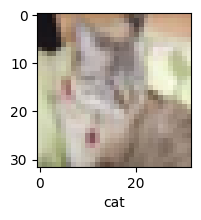

In [ ]:
predictor=int(input("input a number to get the prediction"))

print('class--> ',pred_label[predictor])

showImage(X_test,y_test,predictor)

In [ ]:
test_loss, test_accuracy=model.evaluate(X_test,y_test) #evaluate the model.

313/313 [==============================] - 1s 3ms/step - loss: 0.9577 - acc: 0.7054


# Report

In [ ]:
# Print the classification report to evaluate the model's performance
print(classification_report(y_test,pred_label))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76      1000
           1       0.88      0.79      0.83      1000
           2       0.61      0.58      0.59      1000
           3       0.49      0.50      0.49      1000
           4       0.56      0.76      0.64      1000
           5       0.71      0.48      0.57      1000
           6       0.73      0.82      0.77      1000
           7       0.79      0.72      0.76      1000
           8       0.78      0.86      0.82      1000
           9       0.82      0.79      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



In [ ]:
matrix=confusion_matrix(y_test,pred_label) #make a confusion matrix.
print(matrix)

[[763   9  54  24  28   1  10  11  76  24]
 [ 32 787   4  16   8   0  19   2  40  92]
 [ 74   2 578  63 136  42  62  19  16   8]
 [ 20   8  80 497 123  98  87  42  30  15]
 [  9   2  67  47 760  15  47  41  11   1]
 [ 11   2  79 231  91 481  47  44   7   7]
 [  2   1  37  51  65   7 817   7  10   3]
 [ 14   1  37  47 128  27  12 721   4   9]
 [ 58  18   9  17  10   2   4   1 863  18]
 [ 30  60  10  21  15   2   8  20  47 787]]


# Data Visualisation

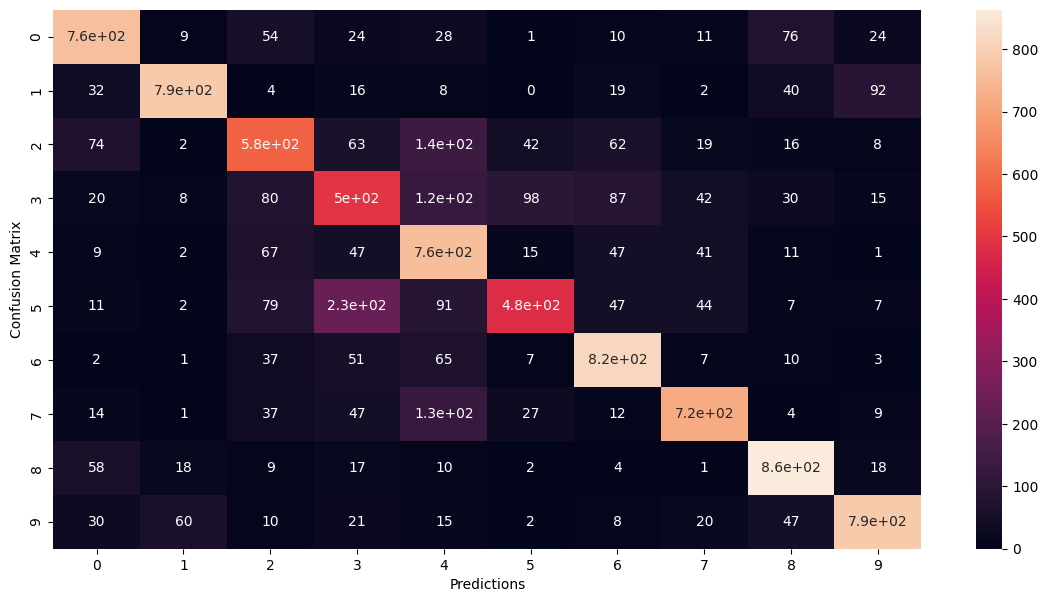

In [ ]:
#Create a visualisation for the confusion matrix.
plt.figure(figsize=(14,7))
sns.heatmap(matrix,annot=True)
plt.ylabel("Truth")
plt.xlabel("Predictions")
plt.ylabel("Confusion Matrix")
plt.show()

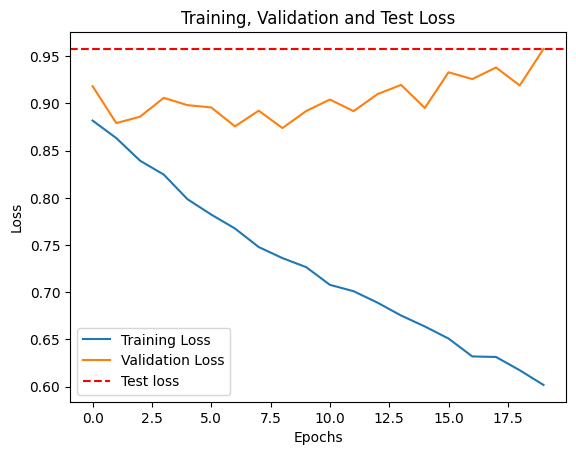

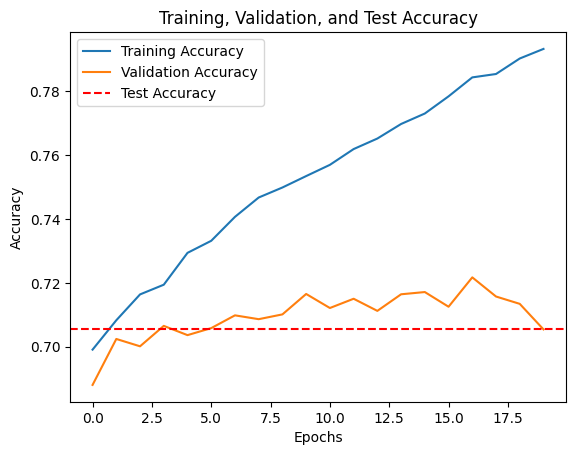

In [ ]:
h = history

plt.plot(h.history['loss'], label='Training Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation and Test Loss')
plt.show()

# Plot the accuracy values
plt.plot(h.history['acc'], label='Training Accuracy')
plt.plot(h.history['val_acc'], label='Validation Accuracy')


# Add the testing accuracy to the plot
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.show()